In [20]:
#Visualisoidaan eri alojen tuotot vuoden sisällä. Käytetään tähän Vanguardin tarjoamia ETF:iä, jotka seuraavat tiettyä
#alaa:
#Tech = Vanguard Information Technology Index Fund ETF Shares (VGT)
#Finance = Vanguard Financials Index Fund ETF Shares (VFH)
#Healthcare = Vanguard Health Care Index Fund ETF Shares (VHT)
#Consumer Cyclical = Vanguard Consumer Discretionary Index Fund ETF Shares (VCR)
#Industrials = Vanguard Industrials Index Fund ETF Shares (VIS)
#Communication Services = Vanguard Communication Services Index Fund ETF Shares (VOX)
#Consumer Defensive = Vanguard Consumer Staples Index Fund ETF Shares (VDC)
#Energy = Vanguard Energy Index Fund ETF Shares (VDE)
#Basic Materials = Vanguard Materials Index Fund ETF Shares (VAW)
#Real Estate = Vanguard Real Estate Index Fund ETF Shares (VNQ)
#Utilities = Vanguard Utilities Index Fund ETF Shares (VPU)

In [21]:
#Kerätään näistä ETF:istä historiallinen data ja työkalut, joilla dataa käsitellään.
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
tickerit = ['VGT', 'VFH', 'VHT', 'VCR', 'VIS', 'VOX', 'VDC', 'VDE', 'VAW', 'VNQ', 'VPU']

In [49]:
data = yf.download(tickerit, period='1y')

[*********************100%%**********************]  11 of 11 completed


In [50]:
#Poistetaan turhat sarakkeet eli kaikki paitsi Adjusted Close
df = data['Adj Close'].copy()

In [51]:
#Otetaan kuukauden mediaanituotto, koska alkuperäinen data sisältää poikkeavuuksia, joten on helpompi ottaa mediaani.
kk_data = df.resample('M').median()
kk_data = kk_data.pct_change() #Muutetaan absoluuttiset hinnan nousut prosentuaalisiksi, joista ensimmäiseen verrataan
kk_data = kk_data.iloc[1:] #Poistetaan ensimmäinen rivi, koska se on Nan-arvo, jolla ei ole aikaisempia vertailukohteita.

In [55]:
print(kk_data.head(5))

Ticker           VAW       VCR       VDC       VDE       VFH       VGT  \
Date                                                                     
2023-09-30 -0.022005 -0.005254 -0.020377  0.041419 -0.003589 -0.005141   
2023-10-31 -0.046002 -0.063822 -0.051198 -0.026398 -0.043608 -0.023953   
2023-11-30  0.036945  0.062772  0.027222 -0.040233  0.062153  0.091778   
2023-12-31  0.070510  0.080176  0.031076 -0.001223  0.085785  0.054235   
2024-01-31 -0.014667 -0.021265  0.024059 -0.015582  0.017239  0.007800   

Ticker           VHT       VIS       VNQ       VOX       VPU  
Date                                                          
2023-09-30 -0.017266 -0.031617 -0.021284 -0.009171 -0.001381  
2023-10-31 -0.028387 -0.043485 -0.077794 -0.009107 -0.069041  
2023-11-30 -0.002740  0.050059  0.070419  0.048641  0.054600  
2023-12-31  0.055587  0.080303  0.110655  0.026231  0.029403  
2024-01-31  0.043850 -0.000758 -0.010305  0.038073 -0.023285  


In [53]:
#Nyt data näyttää hyvältä ja voidaan aloittaa visualisointi

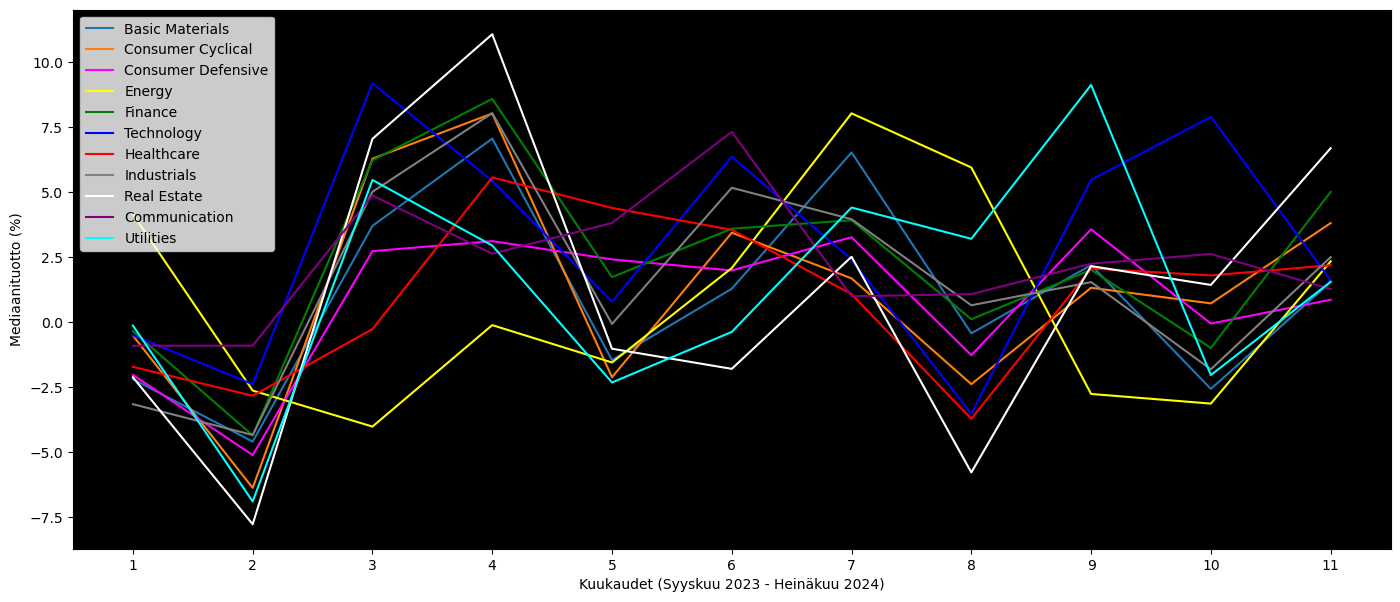

In [58]:
kuukaudet = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11]
plt.figure(figsize=(17,7))
ax = plt.gca()
ax.set_facecolor('black')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.plot(kuukaudet, kk_data['VAW']*100, label='Basic Materials')
plt.plot(kuukaudet, kk_data['VCR']*100, label='Consumer Cyclical')
plt.plot(kuukaudet, kk_data['VDC']*100, label='Consumer Defensive', color='magenta')
plt.plot(kuukaudet, kk_data['VDE']*100, label='Energy', color='yellow')
plt.plot(kuukaudet, kk_data['VFH']*100, label='Finance', color='green')
plt.plot(kuukaudet, kk_data['VGT']*100, label='Technology', color='blue')
plt.plot(kuukaudet, kk_data['VHT']*100, label='Healthcare', color='red')
plt.plot(kuukaudet, kk_data['VIS']*100, label='Industrials', color='gray')
plt.plot(kuukaudet, kk_data['VNQ']*100, label='Real Estate', color='white')
plt.plot(kuukaudet, kk_data['VOX']*100, label='Communication', color='purple')
plt.plot(kuukaudet, kk_data['VPU']*100, label='Utilities', color='cyan')

plt.xlabel('Kuukaudet (Syyskuu 2023 - Heinäkuu 2024)')
plt.ylabel('Mediaanituotto (%)')
plt.legend()